In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Library yang digunakan untuk melakukan data cleaning dan EDA

# Student Registration

In [2]:
#Load data Student registration dan menampilkan 5 data teratasnya
data_regis = pd.read_csv('studentRegistration.csv')
data_regis.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [3]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_regis.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [4]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_regis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
#Digunakan untuk mengecek missing value pada data registration
data_regis.isnull().any()

code_module            False
code_presentation      False
id_student             False
date_registration       True
date_unregistration     True
dtype: bool

In [6]:
#Menghitung jumlah missing value pada kolom 'date_registration'
data_regis['date_registration'].isnull().sum()

45

In [7]:
#Handling missing value pada kolom 'date_registration' dengan cara menghapus data dikarenakan jumlah missing value sedikit dibandingkan dengan keseluruhan data
data_regis = data_regis.dropna(subset=['date_registration'])

In [8]:
#Menghitung jumlah missing value pada kolom 'date_unregistration'
data_regis['date_unregistration'].isnull().sum()

22515

In [9]:
#Handling missing value pada kolom 'date_unregistration' dengan cara mengganti null value dengan 0 dan yang lainnya 1. Hal ini dilakukan karena jumlah data null value lumayan banyak sehingga tidak memungkinkan untuk dihapus
data_regis['date_unregistration']=['0' if pd.isnull(days) else '1' for days in data_regis['date_unregistration']]

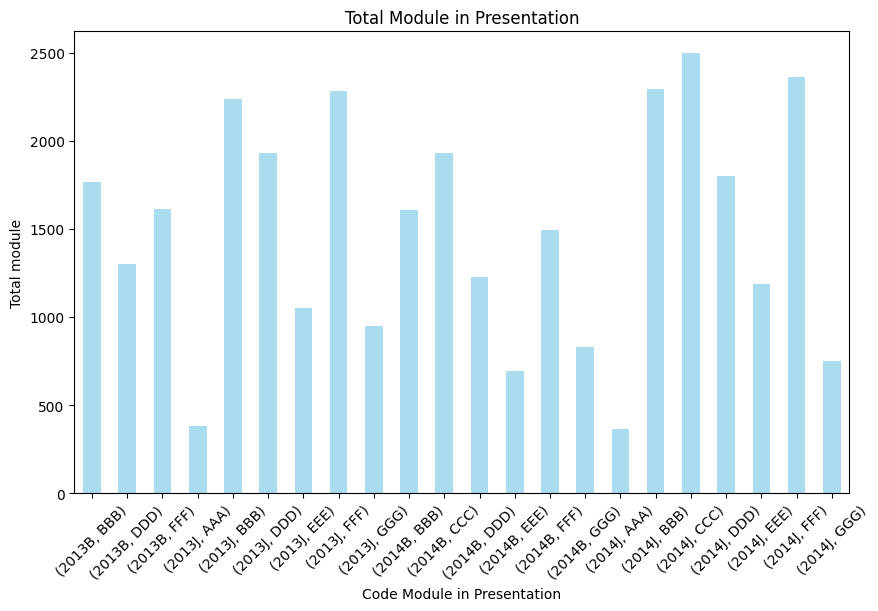

In [10]:
#Visualization : memvisualisasikan berdasarkan tahun, bulan, kode modul dan jumlah modul. 
#Jadi dengan adanya ini kita dapat mengetahui contohnya pada tahun 2013 dan mulai presentasi pada bulan Februari, untuk code modul BBB berjumlah lebih dari 1500 
modul_per_tahun = data_regis.groupby(['code_presentation', 'code_module'])['code_module'].count()

# Membuat grafik bar
plt.figure(figsize=(10, 6))
modul_per_tahun.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Total Module in Presentation')
plt.xlabel('Code Module in Presentation')
plt.ylabel('Total module')
plt.xticks(rotation=45)
plt.show()

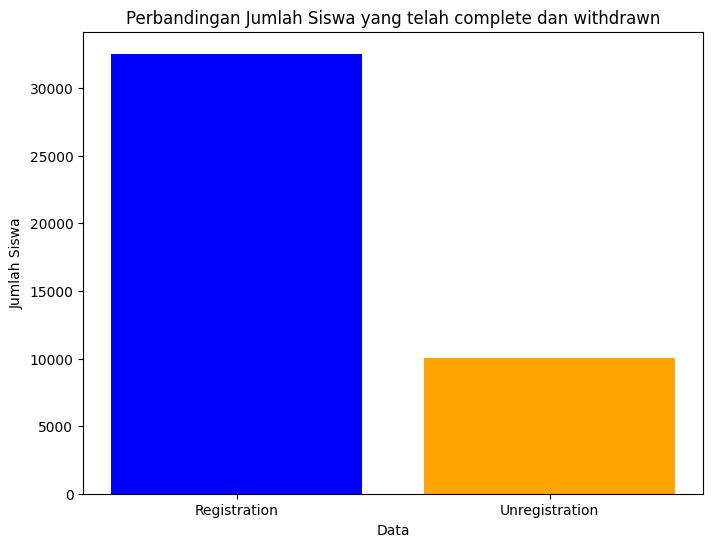

Jumlah data siswa yang complete: 22515
Jumlah data siswa yang withdrawn: 10033


In [11]:
#Visualization : memvisualisasikan jumlah antara siswa yang sudah menyelesaikan kursus dan yang withdrawn
# Menghitung jumlah data yang telah registrasi dan unregistrasi
jumlah_kolom1 = data_regis['date_registration'].count()
jumlah_kolom2 = data_regis['date_unregistration'].value_counts().get(1, 0)

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(['Registration', 'Unregistration'], [jumlah_kolom1, jumlah_kolom2], color=['blue', 'orange'])
plt.title('Perbandingan Jumlah Siswa yang telah complete dan withdrawn')
plt.xlabel('Data')
plt.ylabel('Jumlah Siswa')
plt.show()

print(f"Jumlah data siswa yang complete: {jumlah_kolom1-jumlah_kolom2}")
print(f"Jumlah data siswa yang withdrawn: {jumlah_kolom2}")


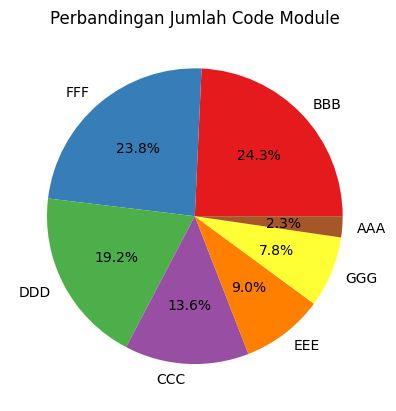

In [12]:
#Visualization : memvisualisasikan perbandingan jumlah code modul yang ada. Dan didapatkan bahwa modul yang paling banyak diambil adala BBB
module_counts = data_regis['code_module'].value_counts()
plt.pie(module_counts, labels=module_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Perbandingan Jumlah Code Module')
plt.show()

# Courses

In [13]:
##Load data Courses dan menampilkan 5 data teratasnya
data_courses = pd.read_csv('courses.csv')
data_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [14]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [15]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [16]:
#Digunakan untuk mengecek missing value pada data couses. Karena tidak ada maka langsung lanjut ke visualisasi
data_courses.isnull().any()

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

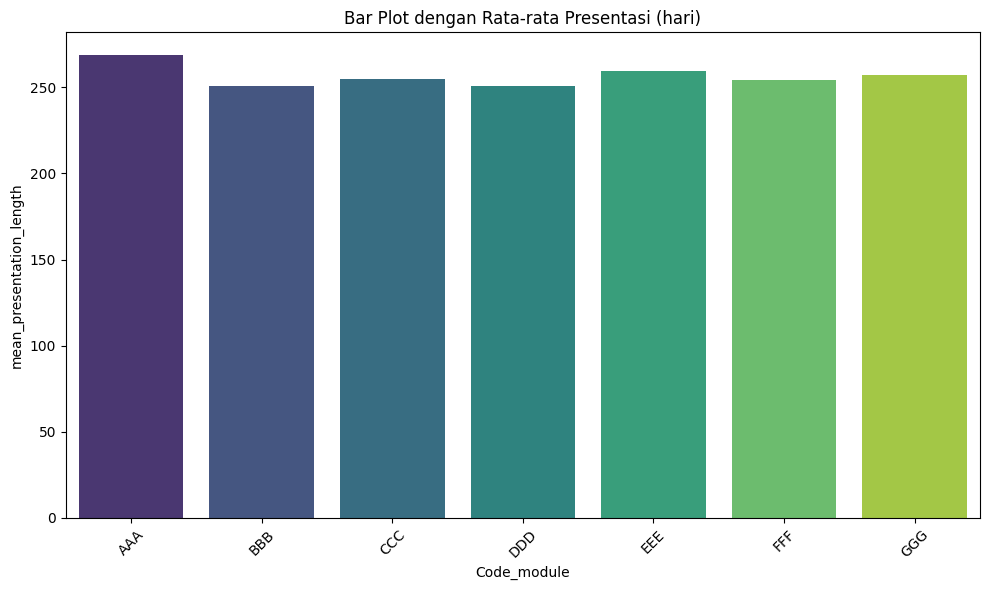

In [17]:
#Visualization : memvisualisasikan rata-rata presentasi modul dalam hari

# Menghitung rata-rata dari kolom yang dipilih
mean_data = data_courses.groupby('code_module')['module_presentation_length'].mean().reset_index()

# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='code_module', y='module_presentation_length', data=mean_data, palette='viridis')
plt.title('Bar Plot dengan Rata-rata Presentasi (hari)')
plt.xlabel('Code_module')
plt.ylabel('mean_presentation_length')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# StudentInfo

In [18]:
#Load data Student Info dan menampilkan 5 data teratasnya
data_stud = pd.read_csv('studentInfo.csv')
data_stud.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [19]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_stud.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [20]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [21]:
#Digunakan untuk mengecek missing value pada data StudentInfo

In [22]:
# menghitung jumlah null value pada kolom 'imd_band'
data_stud['imd_band'].isnull().sum()

1111

In [23]:
# handling nullvalue dengan cara mengantinya dengan angka 0
data_stud['imd_band'].fillna('0', inplace=True)

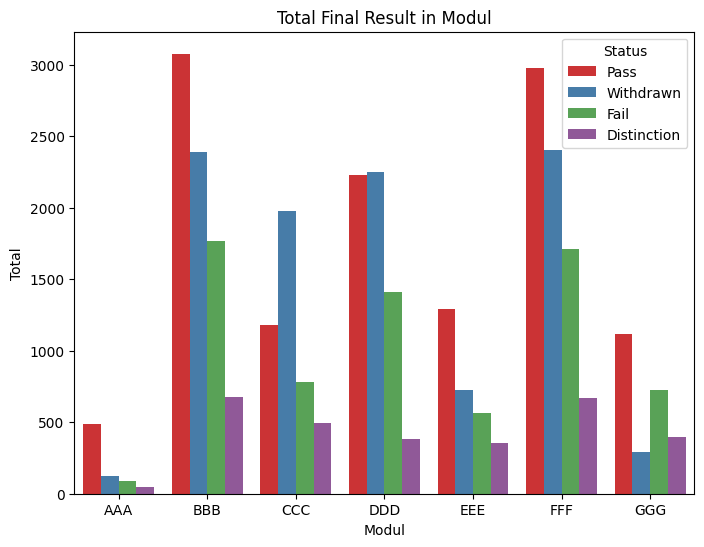

In [24]:
#Visualization : memvisualisasikan jumlah siswa yang pass, withdrawn, fail, atau distinction pada masing-masing modul
# Membuat countplot menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data_stud, x='code_module', hue='final_result', palette='Set1')
plt.title('Total Final Result in Modul')
plt.xlabel('Modul')
plt.ylabel('Total')
plt.legend(title='Status')
plt.show()

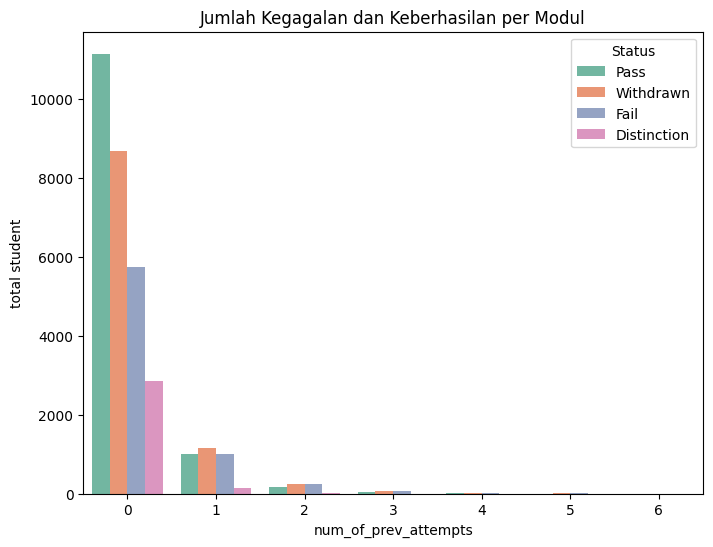

In [25]:
#Visualization : memvisualisasikan jumlah siswa mencoba modul terhadap final result. Dan hasilnya dapat dilihat semakin sedikit siswa mencoba modul maka hasilnya semakin baik 
plt.figure(figsize=(8, 6))
sns.countplot(data=data_stud, x='num_of_prev_attempts', hue='final_result', palette='Set2')
plt.title('Jumlah Kegagalan dan Keberhasilan per Modul')
plt.xlabel('num_of_prev_attempts')
plt.ylabel('total student')
plt.legend(title='Status')
plt.show()

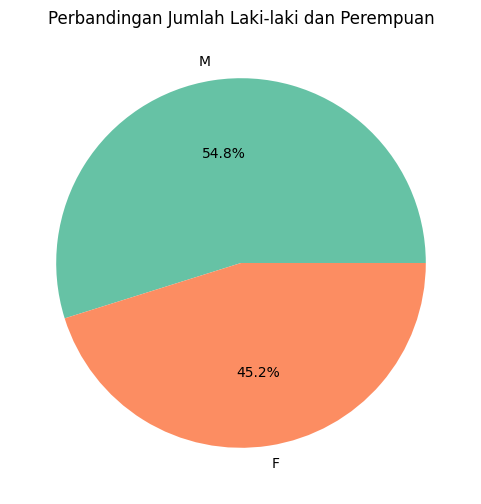

In [26]:
#Visualization : memvisualisasikan perbandingan siswa laki-laki dan perempuan
gender_counts = data_stud['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Perbandingan Jumlah Laki-laki dan Perempuan')
plt.show()

# StudentAssessment

In [27]:
#Load data Student Assessement dan menampilkan 5 data teratasnya
data_studeAssess = pd.read_csv('studentAssessment.csv')
data_studeAssess.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [28]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_studeAssess.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [29]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_studeAssess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [30]:
#Digunakan untuk mengecek missing value pada data studentAssessement
data_studeAssess.isnull().any()

id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score              True
dtype: bool

In [31]:
# menghitung jumlah null value pada kolom 'score'
data_studeAssess['score'].isnull().sum()

173

In [32]:
# handling null value pada kolom 'score' dengan cara menghapus baris, dikarenakan jumlah null value sedikit dibandingkan dengan keseluruhan data
data_studeAssess = data_studeAssess.dropna(subset=['score'])

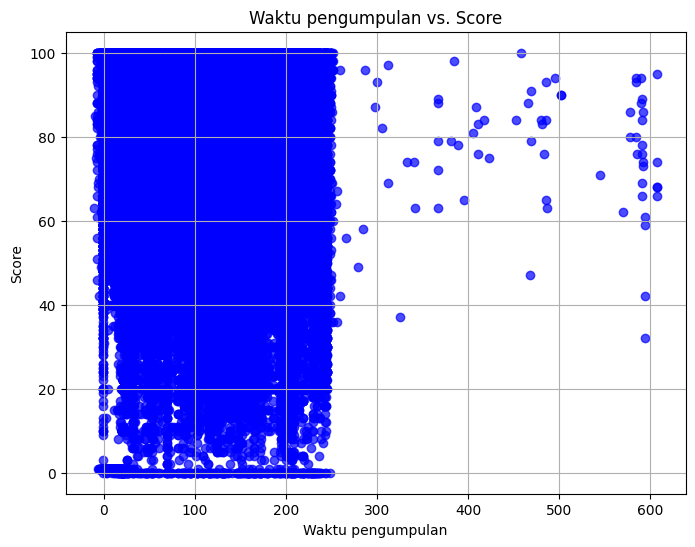

In [33]:
#Visualization : memvisualisasikan pengaruh waktu pengumpulan dengan score yang diperoleh.
plt.figure(figsize=(8, 6))
plt.scatter(data_studeAssess['date_submitted'], data_studeAssess['score'], c='blue', alpha=0.7)
plt.title('Waktu pengumpulan vs. Score')
plt.xlabel('Waktu pengumpulan')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Assessments

In [34]:
#Load data assessments dan menampilkan 5 data teratasnya
data_Assess = pd.read_csv('assessments.csv')
data_Assess.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [35]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_Assess.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [36]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_Assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [37]:
#Digunakan untuk mengecek missing value pada data assessements
data_Assess.isnull().any()

code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
date                  True
weight               False
dtype: bool

In [38]:
#Menghitung jumlah null valu pada 'date'
data_Assess['date'].isnull().sum()

11

In [39]:
#Dikarenakan jumlah keseluruhan data date sedikit, maka missing value dihandling dengan digantikan oleh mean pada kolom 'date'
data_Assess['date'].fillna(data_Assess['date'].mean(), inplace=True)

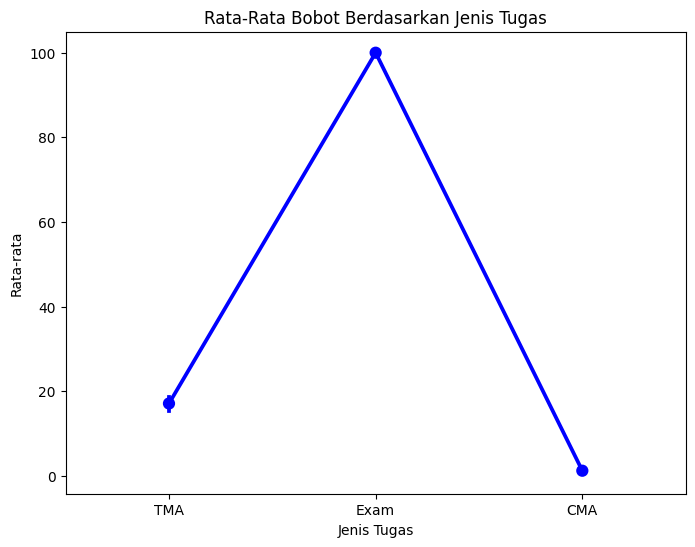

In [40]:
#Visualization : memvisualisasikan tipe tugas dengan bobot yang akan diperoleh. Hasilnya tipe exam memiliki bobot paling tinggi dan CMA paling rendah.
plt.figure(figsize=(8, 6))
sns.pointplot(data=data_Assess, x='assessment_type', y='weight', color='blue')
plt.title('Rata-Rata Bobot Berdasarkan Jenis Tugas')
plt.xlabel('Jenis Tugas')
plt.ylabel('Rata-rata')
plt.show()


# Student Vle

In [41]:
#Load data Student Vle dan menampilkan 5 data teratasnya
data_studvle = pd.read_csv('StudentVle.csv')
data_studvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [42]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_studvle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [43]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_studvle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [44]:
#Digunakan untuk mengecek missing value pada data StudentVle. Karena tidak ada maka lanjut ke visualisasi
data_studvle.isnull().any()

code_module          False
code_presentation    False
id_student           False
id_site              False
date                 False
sum_click            False
dtype: bool

<Axes: xlabel='code_module'>

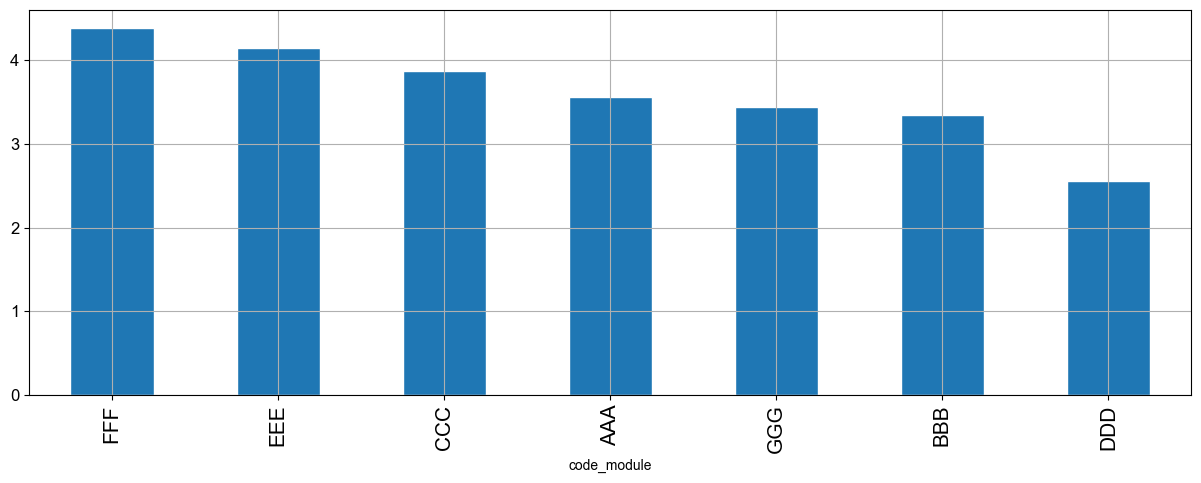

In [45]:
#visualization : memvisualisasikan rata-rata jumlah siswa berinteraksi terhadap materi dengan code modul
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
data_studvle.groupby(['code_module'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')

# Vle

In [46]:
#Load data vle dan menampilkan 5 data teratasnya
data_vle = pd.read_csv('vle.csv')
data_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [47]:
#memberikan ringkasan statistik deskriptif dari kolom-kolom dalam sebuah DataFrame, termasuk informasi seperti rata-rata, median, kuartil, nilai maksimum, dan nilai minimum.
data_vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [48]:
#untuk memberikan informasi ringkas tentang sebuah DataFrame, termasuk informasi tentang tipe data, jumlah baris dan kolom, jumlah nilai yang tidak kosong, dan sebagainya.
data_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [49]:
#Digunakan untuk mengecek missing value pada data Vle
data_vle.isnull().any()

id_site              False
code_module          False
code_presentation    False
activity_type        False
week_from             True
week_to               True
dtype: bool

In [50]:
#Menghitung jumlah null value pada kolom 'week_from'
data_vle['week_from'].isnull().sum()

5243

In [51]:
#Menghitung jumlah null value pada kolom 'week_to'
data_vle['week_to'].isnull().sum()

5243

In [52]:
#Dikarenakan jumlah null value pada kolom week_from dan week_to lebh dari 80% makan kedua kolom tersebut akan dihapus
data_vle = data_vle.drop(['week_from', 'week_to'], axis = 1)

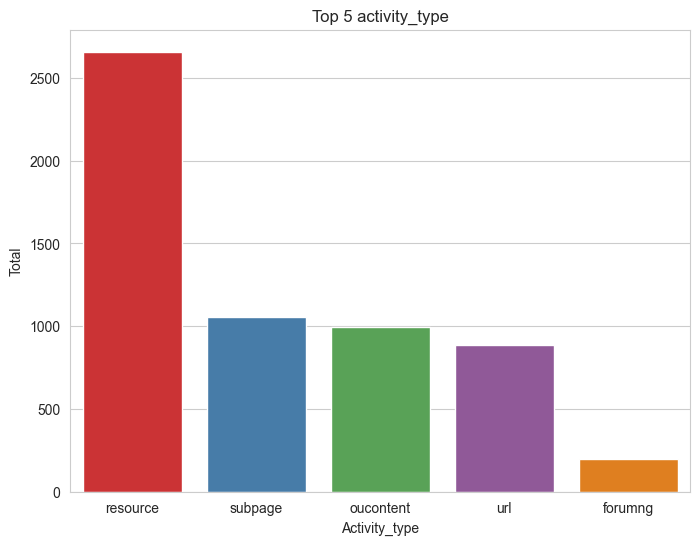

In [53]:
#Visualization : memvisualisasikan top 5 peran yang terkait dengan materi modul. Dan dihasilkan bahwa peran yang paling banyak digunakan adalah resource
top_categories = data_vle['activity_type'].value_counts().head(5)

# Membuat bar plot dengan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set1')
plt.title('Top 5 activity_type')
plt.xlabel('Activity_type')
plt.ylabel('Total')
plt.show()

